In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/skillupAI/CNN

/content/drive/MyDrive/skillupAI/CNN


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle
from optimizer import Adam
from CNN_ver2 import Three_ConvNet
from keras.preprocessing.image import ImageDataGenerator

## train データを取得

In [4]:
train_data = np.load("./1_data/train_data.npy")
train_label = np.load("./1_data/train_label.npy")

In [5]:
train_data.shape

(3000, 1, 28, 28)

## 正規化

In [6]:
# 正規化
train_data = (train_data - train_data.min()) / train_data.max()
train_data = train_data.astype('float32')

# 配列形式変更
train_data = train_data.reshape(-1, 28*28)

## ミニバッチ学習

In [8]:
epochs = 10

batch_size = 16
lr = 0.01
loop = 5

optimizer = Adam()

# CNNのオブジェクト生成
snet = Three_ConvNet(input_dim=(1, 28, 28),
                     conv_param={'filter_size':3, 'pad':1, 'stride':1},
                     pool_param={'pool_size':2, 'pad':0, 'stride':2},filter_num_list=[32,64,64],
                     hidden_size=100, output_size=15, weight_init_std=0.01)

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

#データ拡張に使う
datagen = ImageDataGenerator(rotation_range = 20, height_shift_range = 0.1,width_shift_range = 0.1,zoom_range= 0.1)

for i in range(loop):
    train, test, train_labels, test_labels = train_test_split(train_data, train_label, test_size=0.3,shuffle=True)
    train = train.reshape(-1, 1, 28, 28)
    test = test.reshape(-1, 1, 28, 28)
    x = train
    t = train_labels
    x = x.reshape(-1,1,28,28) # 配列形式の変形

    # 繰り返し回数
    xsize = x.shape[0]
    iter_num = np.ceil(xsize / batch_size).astype(np.int)

    x = x.reshape(-1,1,28,28) # 配列形式の変形
    for epoch in range(epochs):
        print("epoch=%s"%epoch)

        # シャッフル
        idx = np.arange(xsize)
        np.random.shuffle(idx)

        for it in range(iter_num):
            """
            ランダムなミニバッチを順番に取り出す
            """
            print("it=", it)
            mask = idx[batch_size*it : batch_size*(it+1)]

            # ミニバッチの生成
            x_train = x[mask]
            t_train = t[mask]

            g = datagen.flow(x_train, batch_size = batch_size,shuffle=False)
            batches = g.next()

            # 勾配の計算 (誤差逆伝播法を用いる)
            grads = snet.gradient(batches, t_train)

            # 更新
            optimizer.update(snet.params, grads)

        ## 学習経過の記録

        # 訓練データにおけるloss
        #     print("calculating train_loss")
        train_loss.append(snet.loss(x,  t))

        #     print("calculating test_loss")
        # テストデータにおけるloss
        test_loss.append(snet.loss(test, test_labels))

        #     print("calculating train_accuracy")
        # 訓練データにて精度を確認
        train_accuracy.append(snet.accuracy(x, t))

        #     print("calculating test_accuracy")
        # テストデータにて精度を算出
        test_accuracy.append(snet.accuracy(test, test_labels))

<ipython-input-8-41f6929fe222>:33: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  iter_num = np.ceil(xsize / batch_size).astype(np.int)
/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:766: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (16, 1, 28, 28) (28 channels).
  warnings.warn(


epoch=0
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7
it= 8
it= 9
it= 10
it= 11
it= 12
it= 13
it= 14
it= 15
it= 16
it= 17
it= 18
it= 19
it= 20
it= 21
it= 22
it= 23
it= 24
it= 25
it= 26
it= 27
it= 28
it= 29
it= 30
it= 31
it= 32
it= 33
it= 34
it= 35
it= 36
it= 37
it= 38
it= 39
it= 40
it= 41
it= 42
it= 43
it= 44
it= 45
it= 46
it= 47
it= 48
it= 49
it= 50
it= 51
it= 52
it= 53
it= 54
it= 55
it= 56
it= 57
it= 58
it= 59
it= 60
it= 61
it= 62
it= 63
it= 64
it= 65
it= 66
it= 67
it= 68
it= 69
it= 70
it= 71
it= 72
it= 73
it= 74
it= 75
it= 76
it= 77
it= 78
it= 79
it= 80
it= 81
it= 82
it= 83
it= 84
it= 85
it= 86
it= 87
it= 88
it= 89
it= 90
it= 91
it= 92
it= 93
it= 94
it= 95
it= 96
it= 97
it= 98
it= 99
it= 100
it= 101
it= 102
it= 103
it= 104
it= 105
it= 106
it= 107
it= 108
it= 109
it= 110
it= 111
it= 112
it= 113
it= 114
it= 115
it= 116
it= 117
it= 118
it= 119
it= 120
it= 121
it= 122
it= 123
it= 124
it= 125
it= 126
it= 127
it= 128
it= 129
it= 130
it= 131


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:766: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (4, 1, 28, 28) (28 channels).
  warnings.warn(


ストリーミング出力は最後の 5000 行に切り捨てられました。
it= 53
it= 54
it= 55
it= 56
it= 57
it= 58
it= 59
it= 60
it= 61
it= 62
it= 63
it= 64
it= 65
it= 66
it= 67
it= 68
it= 69
it= 70
it= 71
it= 72
it= 73
it= 74
it= 75
it= 76
it= 77
it= 78
it= 79
it= 80
it= 81
it= 82
it= 83
it= 84
it= 85
it= 86
it= 87
it= 88
it= 89
it= 90
it= 91
it= 92
it= 93
it= 94
it= 95
it= 96
it= 97
it= 98
it= 99
it= 100
it= 101
it= 102
it= 103
it= 104
it= 105
it= 106
it= 107
it= 108
it= 109
it= 110
it= 111
it= 112
it= 113
it= 114
it= 115
it= 116
it= 117
it= 118
it= 119
it= 120
it= 121
it= 122
it= 123
it= 124
it= 125
it= 126
it= 127
it= 128
it= 129
it= 130
it= 131
epoch=3
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7
it= 8
it= 9
it= 10
it= 11
it= 12
it= 13
it= 14
it= 15
it= 16
it= 17
it= 18
it= 19
it= 20
it= 21
it= 22
it= 23
it= 24
it= 25
it= 26
it= 27
it= 28
it= 29
it= 30
it= 31
it= 32
it= 33
it= 34
it= 35
it= 36
it= 37
it= 38
it= 39
it= 40
it= 41
it= 42
it= 43
it= 44
it= 45
it= 46
it= 47
it= 48
it= 49
it= 50
it= 51
it= 52
it= 53
it= 54


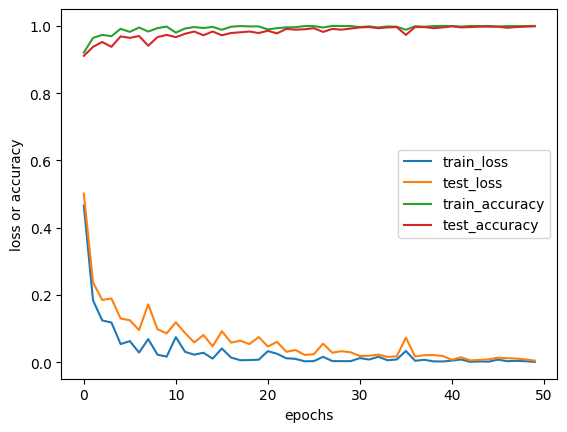

In [9]:
# lossのグラフ化
df_log = pd.DataFrame({"train_loss":train_loss,
             "test_loss":test_loss,
             "train_accuracy":train_accuracy,
             "test_accuracy":test_accuracy})
df_log.plot()
plt.ylabel("loss or accuracy")
plt.xlabel("epochs")
plt.show()

In [10]:
print(test_accuracy)

[0.9111111111111111, 0.9377777777777778, 0.9522222222222222, 0.9377777777777778, 0.9688888888888889, 0.9644444444444444, 0.97, 0.9411111111111111, 0.9666666666666667, 0.9733333333333334, 0.9666666666666667, 0.9766666666666667, 0.9833333333333333, 0.9722222222222222, 0.9833333333333333, 0.9722222222222222, 0.9788888888888889, 0.9811111111111112, 0.9833333333333333, 0.9788888888888889, 0.9855555555555555, 0.9777777777777777, 0.9911111111111112, 0.9888888888888889, 0.99, 0.9933333333333333, 0.9822222222222222, 0.9911111111111112, 0.9888888888888889, 0.9922222222222222, 0.9955555555555555, 0.9966666666666667, 0.9933333333333333, 0.9955555555555555, 0.9966666666666667, 0.9733333333333334, 0.9966666666666667, 0.9966666666666667, 0.9933333333333333, 0.9955555555555555, 0.9988888888888889, 0.9955555555555555, 0.9966666666666667, 0.9977777777777778, 0.9977777777777778, 0.9977777777777778, 0.9944444444444445, 0.9966666666666667, 0.9977777777777778, 0.9988888888888889]


In [11]:
with open("katakana_model_ver6.pickle", "wb") as f:
    pickle.dump(snet, f)

In [ ]:
with open("param_katakana_model_ver5.pickle", "wb") as f:
    pickle.dump(snet.params, f)

In [ ]:
snet.params

{'W1': array([[[[-1.31035215e-02,  6.64967515e-03, -1.98144849e-02],
          [-5.11602161e-03,  2.84320224e-02,  9.26985110e-03],
          [-9.25604166e-03,  2.52309163e-03, -2.32418954e-02]]],
 
 
        [[[-1.06626478e-02, -8.37139630e-03, -1.61850095e-02],
          [ 1.40277981e-02,  1.74149455e-02,  1.82896390e-02],
          [ 1.77336791e-02,  1.50032980e-02,  1.19785971e-02]]],
 
 
        [[[ 6.87554735e-03,  9.45249439e-03, -1.12952708e-02],
          [-5.16421627e-03, -1.04850672e-03, -2.20472525e-02],
          [ 2.00917923e-02,  3.30465377e-02, -9.13910283e-03]]],
 
 
        [[[ 1.61997847e-02,  1.12988891e-02, -1.36411082e-02],
          [ 3.04145282e-03,  1.68284299e-02, -1.29108671e-02],
          [-5.45036760e-03,  1.91136116e-02,  9.84273593e-04]]],
 
 
        [[[-1.44129069e-02,  1.78743936e-02, -5.02645218e-03],
          [-6.31263706e-03,  4.50225536e-03,  1.63962425e-02],
          [ 2.07201126e-02, -2.00977747e-02, -5.63806197e-03]]],
 
 
        [[[-1.46243